In [7]:
import numpy as np
import xarray as xr
from wrf import ll_to_xy
from netCDF4 import Dataset
from dypy.lagranto import Tra
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%matplotlib inline

# Temporal Evolution of Trajectories

In [6]:
def temporal_evolution_trajectories(variable_name, trajs_bunch='all', 
                                    save=False):
    '''This function plots the temporal evolution of trajectories 
    from the chosen variables. Trajectories can be divided in 
    bunches corresponding to different height levels (pbl, 5, 10).
    Supported variables are water_vapor, height and updraft.'''
    
    ### Predefine some variables ###
    number_trajs_plot = 1
    dt = 5 # 100 minutes

    traj_data = '/scratch3/thomasl/work/retrospective_part/lagranto/' \
                    'traj_baden_2000_area_0800.ll'
    
    save_dir = '/scratch3/thomasl/work/retrospective_part'\
                    '/casestudy_baden/lagranto_lidar/'
    
    # Variables for getting PBL height of WRF model data
    lat = 47.25
    lon = 7.85
    date = '2018-05-30'
    time = '16:10'
    filename = '/scratch3/thomasl/work/data/casestudy_baden/wrfout_d02_{}_{}:00'.format(date, time)

    
    # Define plotting variables
    if variable_name == 'water_vapor':
        variable = 'QVAPOR'
        title_name = 'Water Vapor'
        y_label = 'Water Vapor Mixing Ratio [$g$ $kg^{-1}$]'

    elif variable_name == 'height':
        variable = 'z'
        title_name = 'Height'
        y_label = 'Height of Trajectories [$m$]'

    elif variable_name == 'updraft':
        variable = 'W_UP_MAX'
        title_name = 'Updraft'
        y_label = 'Max Z-Wind Updraft [$m$ $s^-$$^1$]'

    
    ### Plotting procedure ###
    trajs = Tra()
    trajs.load_ascii(traj_data)
    
    # Get PBL out of WRF model data
    ncfile = Dataset(filename)
    wrf_file = xr.open_dataset(filename)
    data = wrf_file.PBLH

    location = ll_to_xy(ncfile, lat, lon)
    data_point = data.sel(west_east=location[0], south_north=location[1])
    pbl = data_point.values
    
    # Separate trajectories in 3 vertical bunches
    # Trajectories of pbl (according to pbl height of WRF model data)
    trajspbl=[]
    for t in trajs:
            if (t['z'][0]<=pbl):
                    trajspbl.append(t)

    # Trajectories between pbl and 5000 m   
    trajs5=[]
    for t in trajs:
            if (t['z'][0]>pbl and t['z'][0]<5000):
                    trajs5.append(t)
    
    # Trajectories between 5000 m and 10000 m                
    trajs10=[]
    for t in trajs:
            if (t['z'][0]>5000 and t['z'][0]<=10000):
                    trajs10.append(t)

    trajs = np.array(trajspbl)
    
    # Get time delta
    xtime = np.arange(-len(trajs['time'][0])*dt, 0, dt)+dt

    # Make figure
    plt.figure(figsize=(15,10))
    ax = plt.axes()
    
    # Plot (bunch of) trajectories
    if trajs_bunch == 'pbl':
        for t in trajs[::number_trajs_plot]:
            plt.plot(xtime, np.flipud(t[variable][:]), '-', color='grey',  lw=0.5)

        plt.plot(xtime,np.flipud(np.percentile(trajs[:][variable][:],90,axis=0)),'--',color='blue',lw=2)
        plt.plot(xtime,np.flipud((np.percentile(trajs[:][variable][:],10,axis=0))),'--',color='blue',lw=2)
        plt.plot(xtime,np.flipud(np.mean(trajs[:][variable][:],0)),'-',color='blue',lw=2)

    elif trajs_bunch == '5':
        trajs=np.array(trajs5)
        for t in trajs[::number_trajs_plot]:
            plt.plot(xtime,np.flipud(t[variable][:]),'-',color='grey',lw=0.5)

        plt.plot(xtime,np.flipud(np.percentile(trajs[:][variable][:],90,axis=0)),'--',color='orange',lw=2)
        plt.plot(xtime,np.flipud((np.percentile(trajs[:][variable][:],10,axis=0))),'--',color='orange',lw=2)
        plt.plot(xtime,np.flipud(np.mean(trajs[:][variable][:],0)),'-',color='orange',lw=2)

    elif trajs_bunch == '10':
        trajs=np.array(trajs10)
        for t in trajs[::number_trajs_plot]:
            plt.plot(xtime,np.flipud(t[variable][:]),'-',color='grey',lw=0.5)

        plt.plot(xtime,np.flipud(np.percentile(trajs[:][variable][:],90,axis=0)),'--',color='red',lw=2)
        plt.plot(xtime,np.flipud((np.percentile(trajs[:][variable][:],10,axis=0))),'--',color='red',lw=2)
        plt.plot(xtime,np.flipud(np.mean(trajs[:][variable][:],0)),'-',color='red',lw=2)

    elif trajs_bunch == 'low':
        for t in trajs[::number_trajs_plot]:
            plt.plot(xtime, np.flipud(t[variable][:]), '-', color='grey',  lw=0.5)

        plt.plot(xtime,np.flipud(np.percentile(trajs[:][variable][:],90,axis=0)),'--',color='blue',lw=2)
        plt.plot(xtime,np.flipud((np.percentile(trajs[:][variable][:],10,axis=0))),'--',color='blue',lw=2)
        plt.plot(xtime,np.flipud(np.mean(trajs[:][variable][:],0)),'-',color='blue',lw=2)
        
    elif trajs_bunch == 'all':
        for t in trajs[::number_trajs_plot]:
            plt.plot(xtime, np.flipud(t[variable][:]), '-', color='grey',  lw=0.5)

        plt.plot(xtime,np.flipud(np.percentile(trajs[:][variable][:],90,axis=0)),'--',color='blue',lw=2)
        plt.plot(xtime,np.flipud((np.percentile(trajs[:][variable][:],10,axis=0))),'--',color='blue',lw=2)
        plt.plot(xtime,np.flipud(np.mean(trajs[:][variable][:],0)),'-',color='blue',lw=2)

        trajs=np.array(trajs5)
        for t in trajs[::number_trajs_plot]:
            plt.plot(xtime,np.flipud(t[variable][:]),'-',color='grey',lw=0.5)

        plt.plot(xtime,np.flipud(np.percentile(trajs[:][variable][:],90,axis=0)),'--',color='orange',lw=2)
        plt.plot(xtime,np.flipud((np.percentile(trajs[:][variable][:],10,axis=0))),'--',color='orange',lw=2)
        plt.plot(xtime,np.flipud(np.mean(trajs[:][variable][:],0)),'-',color='orange',lw=2)

        trajs=np.array(trajs10)
        for t in trajs[::number_trajs_plot]:
            plt.plot(xtime,np.flipud(t[variable][:]),'-',color='grey',lw=0.5)

        plt.plot(xtime,np.flipud(np.percentile(trajs[:][variable][:],90,axis=0)),'--',color='red',lw=2)
        plt.plot(xtime,np.flipud((np.percentile(trajs[:][variable][:],10,axis=0))),'--',color='red',lw=2)
        plt.plot(xtime,np.flipud(np.mean(trajs[:][variable][:],0)),'-',color='red',lw=2)

    # Add y- and x-axis label
    plt.ylabel(y_label, fontsize=12.5)
    plt.ylim(0, trajs[variable].max())

    plt.xlabel('Time [$min$]', fontsize=12.5)
    plt.xlim(xtime[0],0)
    
    # Add horizontal gridlines according to height levels
    plt.grid(axis='y', linestyle='--', color='grey')
    
    # Plot legend
    if trajs_bunch == 'pbl' or trajs_bunch == 'low':
        line_mean = mlines.Line2D([], [], color='k', linestyle='-', linewidth=2, label='Mean')
        line_percentiles = mlines.Line2D([], [], color='k', linestyle='--', linewidth=2, 
                                         label='10th and 90th Percentile')
        line_mean_col_pbl = mlines.Line2D([], [], color='b', linestyle='-', linewidth=2, 
                                          label='Planetary Boundary Layer')
        plt.legend(handles=[line_mean, line_percentiles, line_mean_col_pbl], fontsize=10)

    elif trajs_bunch == '5':
        line_mean = mlines.Line2D([], [], color='k', linestyle='-', linewidth=2, label='Mean')
        line_percentiles = mlines.Line2D([], [], color='k', linestyle='--', linewidth=2, 
                                         label='10th and 90th Percentile')
        line_mean_col_5 = mlines.Line2D([], [], color='orange', linestyle='-', linewidth=2, 
                                        label='PBL until 5 km')
        plt.legend(handles=[line_mean, line_percentiles, line_mean_col_5], fontsize=10)

                            
    elif trajs_bunch == '10':
        line_mean = mlines.Line2D([], [], color='k', linestyle='-', linewidth=2, label='Mean')
        line_percentiles = mlines.Line2D([], [], color='k', linestyle='--', linewidth=2, 
                                         label='10th and 90th Percentile')
        line_mean_col_10 = mlines.Line2D([], [], color='r', linestyle='-', linewidth=2, 
                                         label='5 km until 10 km')
        plt.legend(handles=[line_mean, line_percentiles, line_mean_col_10], fontsize=10)

    
    else:
        line_mean = mlines.Line2D([], [], color='k', linestyle='-', linewidth=2, label='Mean')
        line_percentiles = mlines.Line2D([], [], color='k', linestyle='--', linewidth=2, 
                                         label='10th and 90th Percentile')
        line_mean_col_pbl = mlines.Line2D([], [], color='b', linestyle='-', linewidth=2, 
                                          label='Planetary Boundary Layer')
        line_mean_col_5 = mlines.Line2D([], [], color='orange', linestyle='-', linewidth=2, 
                                        label='PBL until 5 km')
        line_mean_col_10 = mlines.Line2D([], [], color='r', linestyle='-', linewidth=2, 
                                         label='5 km until 10 km')
        plt.legend(handles=[line_mean, line_percentiles, line_mean_col_pbl, line_mean_col_5, line_mean_col_10], 
                   fontsize=10)

    # Add title
    plt.title('Temporal Evolution of {} along Trajectories\n' \
              '@ Location of Thunderstorm Initiation ({}, {})'.format(title_name, lat, lon), fontsize = 15)
    
    plt.show()
    
    ### Save figure ###
    if save == True:
        plt.savefig('{}lagranto_lidar_{}_{}_{}_{}_{}.pdf'.format(save_dir, variable_name, 
                                                                 str(dt), trajs_bunch, lat, lon), 
                            bbox_inches='tight')

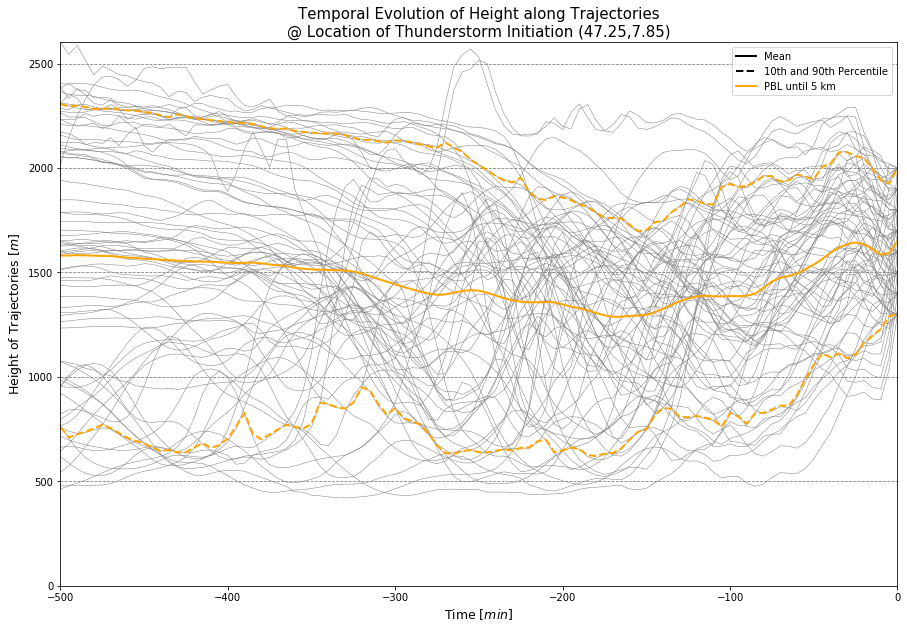

In [5]:
temporal_evolution_trajectories('height', '5', save=False)